In [1]:
# %matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot, cm

# Let's attempt to convolve the lattice with the shape

## Start with the lattice

We'll use a high resolution

<IPython.core.display.Javascript object>


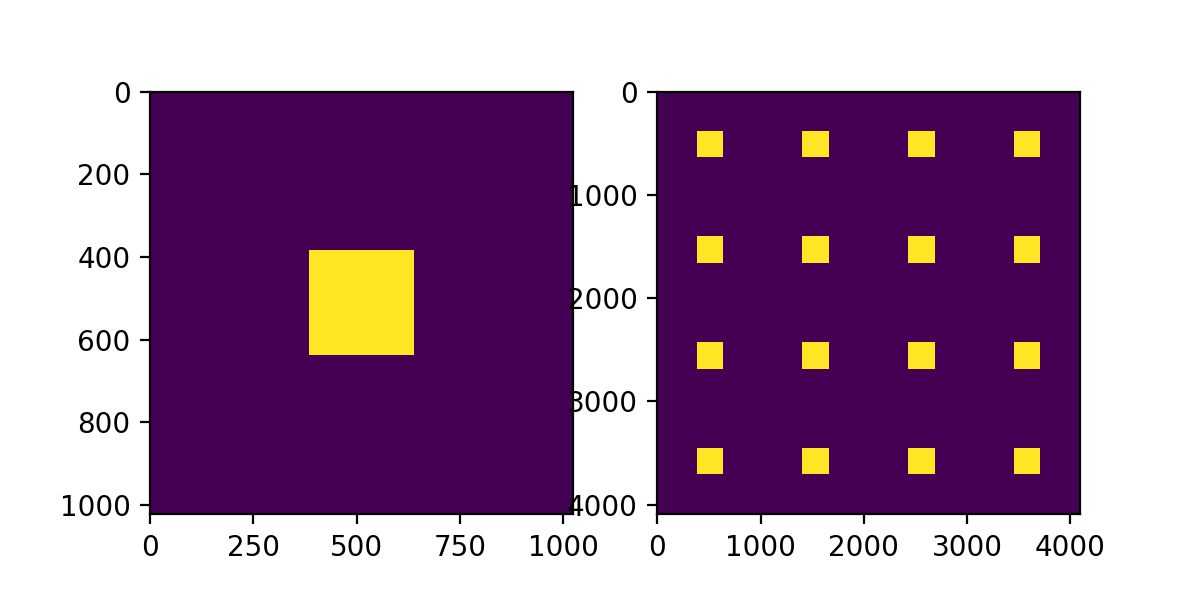

In [2]:
# define the image resolution
N = 1024
latticeImage = np.zeros(shape=(N,N), dtype=np.float64)
# create a meshgrid
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# set the center point as value 1
# latticeImage[N//2, N//2] = 1.0
latticeImage[N//2-N//8:N//2+N//8, N//2-N//8:N//2+N//8] = 1.0
# r = 0.1**2
# R = np.power(X, 2) + np.power(Y, 2)
# latticeImage[R < r] = 1.0
tileImage = np.tile(latticeImage, (4,4))

fig = pyplot.figure(figsize=(6,3))
axUnitCell = fig.add_subplot(121)
ax4x4 = fig.add_subplot(122)
axUnitCell.imshow(latticeImage)
ax4x4.imshow(tileImage)

## take the FFT of both

<IPython.core.display.Javascript object>


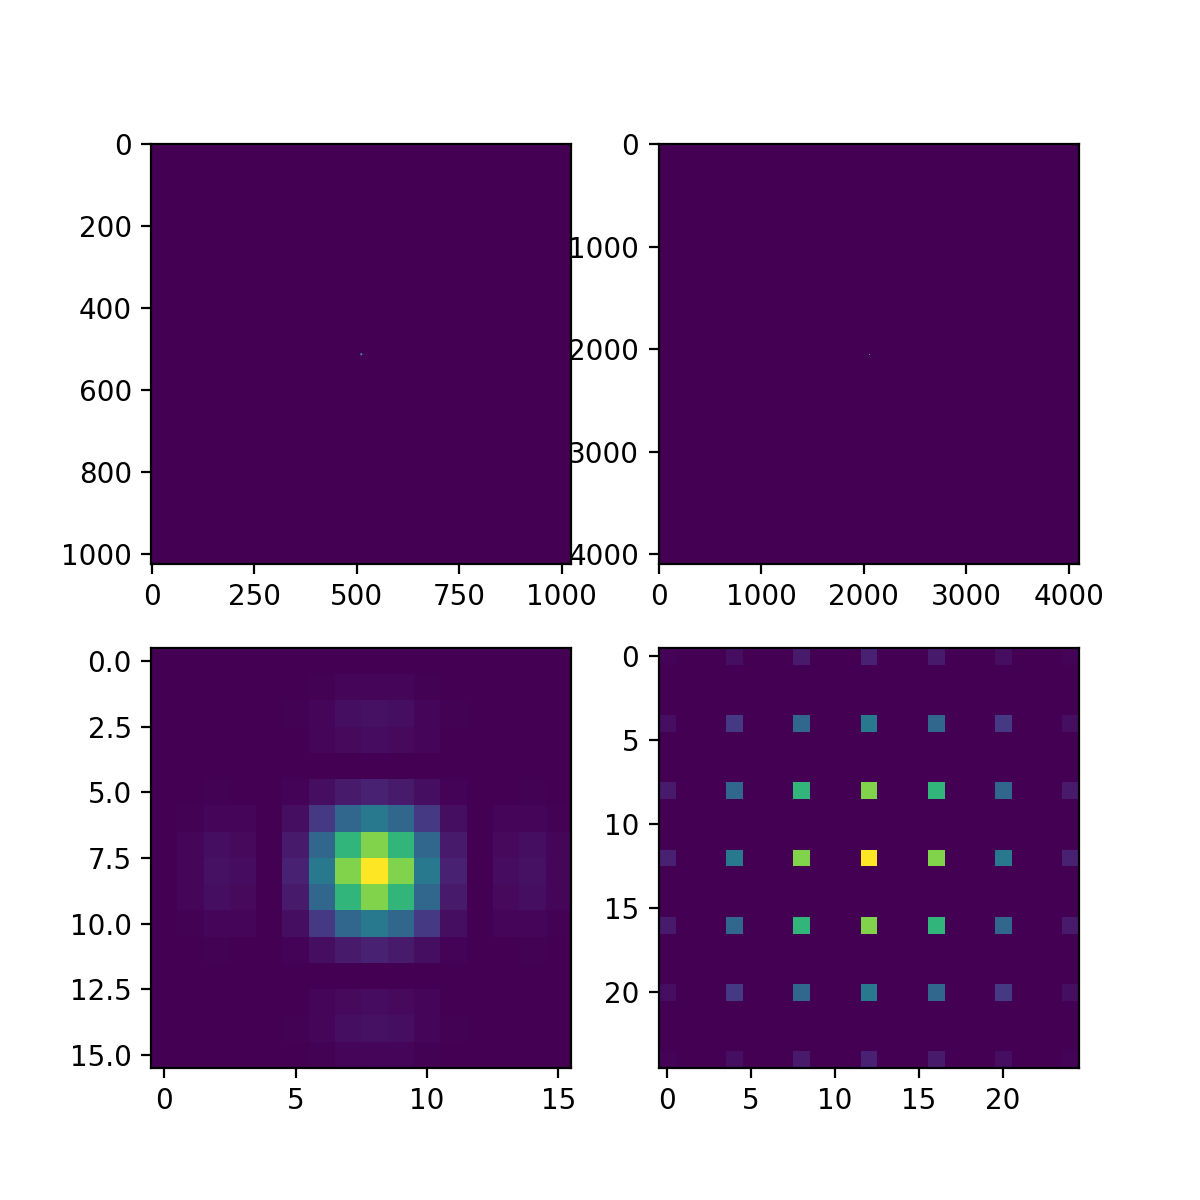

In [4]:
# now for the FFT
imShape = np.shape(latticeImage)
imNorm = imShape[0] * imShape[1]
latticeFFT = np.fft.fftshift(np.fft.fft2(latticeImage)/imNorm)
conjFFT = np.conjugate(latticeFFT)
realLatticeFFT = np.real(np.multiply(latticeFFT, conjFFT))
zoomLatticeFFT = realLatticeFFT[imShape[0]//2-8:imShape[0]//2+8,
                                imShape[1]//2-8:imShape[1]//2+8]

tileShape = np.shape(tileImage)
tileNorm = tileShape[0] * tileShape[1]
tileFFT = np.fft.fftshift(np.fft.fft2(tileImage)/tileNorm)
conjFFT = np.conjugate(tileFFT)
realTileFFT = np.real(np.multiply(tileFFT, conjFFT))
zoomTileFFT = realTileFFT[tileShape[0]//2-12:tileShape[0]//2+13,
                          tileShape[0]//2-12:tileShape[0]//2+13]

fig = pyplot.figure(figsize=(6,6))
axim = fig.add_subplot(221)
axtile = fig.add_subplot(222)
aximZoom = fig.add_subplot(223)
axtileZoom = fig.add_subplot(224)
axim.imshow(realLatticeFFT)
axtile.imshow(realTileFFT)
aximZoom.imshow(zoomLatticeFFT)
axtileZoom.imshow(zoomTileFFT)

## inverse transform

In [12]:
# compare low-frequency/high-frequency
# use the middle values

# powers of 2 to consider
pow2Arr = [i+1 for i in range(9)]
fftshape = (len(pow2Arr), np.shape(latticeFFT)[0], np.shape(latticeFFT)[0])
# create arrays
innerFFT = np.zeros(shape=fftshape, dtype=np.complex128)
outerFFT = np.zeros(shape=fftshape, dtype=np.complex128)
outerFFT[:] = latticeFFT[:,:]


innerReal = np.zeros(shape=fftshape, dtype=np.float64)
outerReal = np.zeros(shape=fftshape, dtype=np.float64)

fftshape = (len(pow2Arr), 64, 64)
innerImage = np.zeros(shape=fftshape, dtype=np.float64)
outerImage = np.zeros(shape=fftshape, dtype=np.float64)
for i, p in enumerate(pow2Arr):
    maskMin = imShape[0]//2-np.power(2,p)
    maskMax = imShape[0]//2+np.power(2,p)+1
    innerFFT[i,maskMin:maskMax,maskMin:maskMax] = latticeFFT[maskMin:maskMax,maskMin:maskMax]
    outerFFT[i,maskMin:maskMax,maskMin:maskMax] = 0.0

    innerInverse = np.fft.ifft2(innerFFT[i]) * imNorm
    conjInv = np.conj(innerInverse)
    innerReal[i] = np.real(np.multiply(innerInverse, conjInv))

    outerInverse = np.fft.ifft2(outerFFT[i]) * imNorm
    conjInv = np.conj(outerInverse)
    outerReal[i] = np.real(np.multiply(outerInverse, conjInv))

    maskMin = imShape[0]//2-32
    maskMax = imShape[0]//2+32
    
    conjFFT = np.conj(innerFFT[i])
    tmpImage = np.real(np.multiply(innerFFT[i], conjFFT))
    innerImage[i] = tmpImage[maskMin:maskMax,maskMin:maskMax]

    conjFFT = np.conj(outerFFT[i])
    tmpImage = np.real(np.multiply(outerFFT[i], conjFFT))
    outerImage[i] = tmpImage[maskMin:maskMax,maskMin:maskMax]

<IPython.core.display.Javascript object>


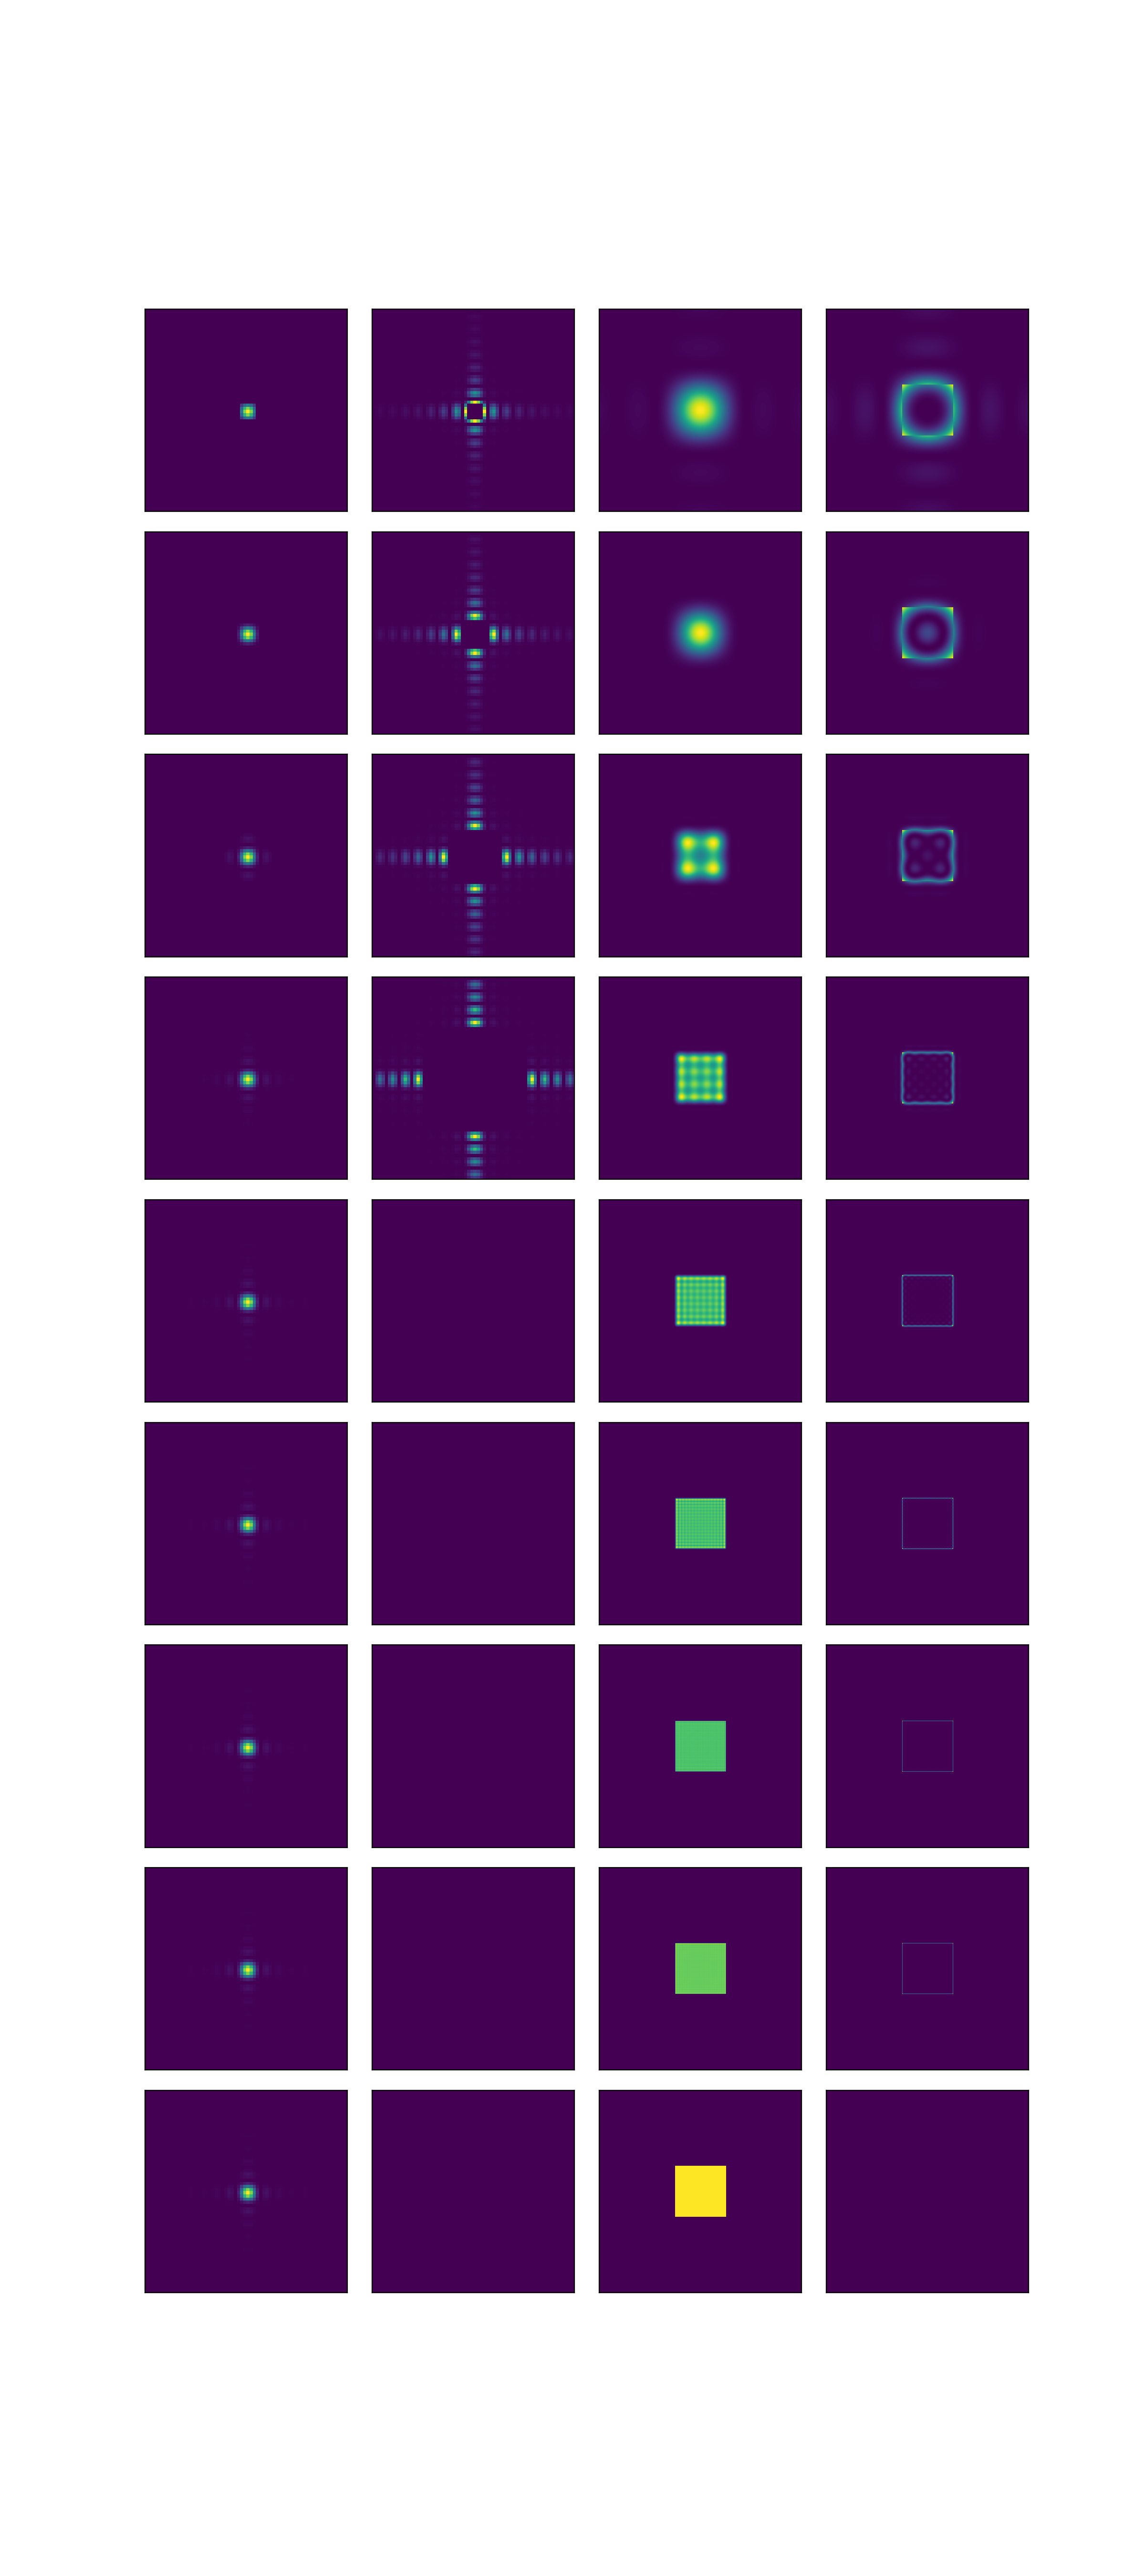

In [13]:
nPlots = int(len(pow2Arr))
dataArr = [innerImage, outerImage, innerReal, outerReal]
fig, axes = pyplot.subplots(nPlots, 4, figsize=(12, 3*len(pow2Arr)),
                           subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(nPlots):
    for j in range(4):
        tmpAx = axes[i,j]
        tmpAx.imshow(dataArr[j][i])
#         tmpPlot.axis('off')
#     axFFTInner = fig.add_subplot(nPlots,4,4*i + 1)
#     axFFTOuter = fig.add_subplot(nPlots,4,4*i + 2)
#     axInner = fig.add_subplot(nPlots,4,4*i + 3)
#     axOuter = fig.add_subplot(nPlots,4,4*i + 4)
#     axFFTInner.imshow(innerImage[i])
#     axFFTOuter.imshow(outerImage[i])
#     axInner.imshow(innerReal[i])
#     axOuter.imshow(outerReal[i])
#     axFFTInner.axis('off')
#     axFFTOuter.axis('off')
#     axInner.axis('off')
#     axOuter.axis('off')
# pyplot.subplots_adjust(wspace=0.1, hspace=0.1)

# Now for the convolution

## Start by creating the lattice and the shape...

In [ ]:
# define the image resolution
N = 64
latticeImage = np.zeros(shape=(N,N), dtype=np.float64)
# create a meshgrid
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# set the center point as value 1
latticeImage[N//2, N//2] = 1.0
latticeImage = np.tile(latticeImage, (16,16))

# define the square image
N = 2048
shapeImage = np.zeros(shape=(N,N), dtype=np.float64)
# create a mesh grid
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
shapeImage = 

fig = pyplot.figure(figsize=(6,3))
axUnitCell = fig.add_subplot(121)
ax4x4 = fig.add_subplot(122)
axUnitCell.imshow(latticeImage)
ax4x4.imshow(tileImage)

In [6]:
imageFFTLR = np.fft.fftshift(np.fft.fft2(imageTileLR)/(np.shape(imageTileLR)[0]*np.shape(imageTileLR)[1]))
conjFFTLR = np.conjugate(imageFFTLR)
newImageLR = np.real(np.multiply(imageFFTLR, conjFFTLR))
N = np.shape(imageTileLR)[0]
newImageLRZoom = newImageLR[N//2-7:N//2+8, N//2-7:N//2+8]

imageFFTHR = np.fft.fftshift(np.fft.fft2(imageTileHR)/(np.shape(imageTileHR)[0]*np.shape(imageTileHR)[1]))
conjFFTHR = np.conjugate(imageFFTHR)
newImageHR = np.real(np.multiply(imageFFTHR, conjFFTHR))
N = np.shape(imageTileHR)[0]
newImageHRZoom = newImageHR[N//2-7:N//2+8, N//2-7:N//2+8]

fig = pyplot.figure(figsize=(6,6))
axLR = fig.add_subplot(221)
axHR = fig.add_subplot(222)
axLRZoom = fig.add_subplot(223)
axHRZoom = fig.add_subplot(224)
axLR.imshow(newImageLR)
axHR.imshow(newImageHR)
axLRZoom.imshow(newImageLRZoom)
axHRZoom.imshow(newImageHRZoom)

NameError: name 'imageTileLR' is not defined

# Reconstruct the image

In [ ]:
# do the inverse fft
inverseImage = np.fft.ifft2(imageFFTHR)
conjImage = np.conj(inverseImage)
tmpImage = np.real(np.multiply(inverseImage, conjImage))
fig = pyplot.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.imshow(tmpImage)

# Try a convolution to reproduce the lattice

In [ ]:
# use the convolution filter
convFilter = imageFFTLR
r = 0.1**2

# define the image
N = 256
imageArray = np.zeros(shape=(N,N), dtype=np.float64)
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < r] = 1.0

fig = pyplot.figure(figsize=(6,6))
ax0 = fig.add_subplot(221)
ax0.imshow(imageArray)

tileArray = np.tile(imageArray, (4, 4))
ax1 = fig.add_subplot(222)
ax1.imshow(tileArray)

# take the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(N*N))
# convolve via multiplication
# newFFT = np.multiply(convFilter, imageFFT)
newFFT = np.multiply(imageFFT, convFilter)
conjFFT = np.conj(newFFT)
tmpFFT = np.real(np.multiply(newFFT, conjFFT))
ax2 = fig.add_subplot(223)
ax2.imshow(tmpFFT)
# conjFFTLR = np.conjugate(imageFFTLR)
# newImageLR = np.real(np.multiply(imageFFTLR, conjFFTLR))
# newImageLRZoom = newImageLR[N//2-3:N//2+4, N//2-3:N//2+4]

# invert and view
inverseImage = np.fft.ifft2(newFFT)*(N*N)
conjImage = np.conj(inverseImage)
tmpImage = np.real(np.multiply(inverseImage, conjImage)) *(N*N)
ax3 = fig.add_subplot(224)
ax3.imshow(tmpImage)

# Try the reconstruction by hand

In [ ]:
# use the convolution filter
convFilter = imageFFTLR
r = 0.7**2

# define the image
N = 256
imageArray = np.zeros(shape=(N,N), dtype=np.float64)
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < r] = 1.0

fig = pyplot.figure(figsize=(6,6))
ax0 = fig.add_subplot(221)
ax0.imshow(imageArray)

tileArray = np.tile(imageArray, (4, 4))
ax1 = fig.add_subplot(222)
ax1.imshow(tileArray)

# take the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(N*N))
newFFT = np.zeros(shape=(4*np.shape(imageFFT)[0], 4*np.shape(imageFFT)[1]), dtype=np.complex128)
# it's trivial to create the lattice just by altering the spacing
# need to implement this "generally" so that I can obtain different lattices
for i in range(np.shape(imageFFT)[0]):
    for j in range(np.shape(imageFFT)[1]):
        newFFT[2*i, 2*j] = imageFFT[i, j]
tmpN = 4*np.shape(imageFFT)[0]
# newFFT = newFFT[tmpN//2-127:tmpN//2+128, tmpN//2-127:tmpN//2+128]
# newFFT = newFFT[0:256, 0:256]
tmpN = np.shape(newFFT)[0]
conjFFT = np.conj(newFFT)
tmpFFT = np.real(np.multiply(newFFT, conjFFT))
ax2 = fig.add_subplot(223)
ax2.imshow(tmpFFT)
print(np.where(tmpFFT > 0))
# conjFFTLR = np.conjugate(imageFFTLR)
# newImageLR = np.real(np.multiply(imageFFTLR, conjFFTLR))
# newImageLRZoom = newImageLR[N//2-3:N//2+4, N//2-3:N//2+4]

# invert and view
print(np.shape(newFFT))
inverseImage = np.fft.ifft2(newFFT) * tmpN * tmpN
conjImage = np.conj(inverseImage)
tmpImage = np.real(np.multiply(inverseImage, conjImage))
ax3 = fig.add_subplot(224)
ax3.imshow(tmpImage)

In [ ]:
# regardless of the number of times I tile, the FFT is identical, as it should be
# Now to change the periodicity
# define the system image
imageArray = np.zeros(shape=(512,512), dtype=np.float64)
x = np.linspace(-1, 1, 512)
y = np.linspace(-1, 1, 512)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-1), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-1), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+1), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+1), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

pyplot.imshow(imageArray)

In [ ]:
# now for the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(np.shape(imageArray)[0]*np.shape(imageArray)[1]))
conjFFT = np.conjugate(imageFFT)
newImage = np.real(np.multiply(imageFFT, conjFFT))
pyplot.imshow(newImage, vmin=1e-6, vmax=0.15)

In [ ]:
# now let's tile
imageTile = np.tile(imageArray, (4,4))
pyplot.imshow(imageTile)
np.shape(imageTile)

In [ ]:
imageFFT = np.fft.fftshift(np.fft.fft2(imageTile)/(np.shape(imageTile)[0]*np.shape(imageTile)[1]))
conjFFT = np.conjugate(imageFFT)
newImage = np.real(np.multiply(imageFFT, conjFFT))
print(newImage)
pyplot.imshow(newImage,
             vmin=1e-6, vmax=0.15)

In [ ]:
# regardless of the number of times I tile, the FFT is identical, as it should be
# Now to change the periodicity
# define the system image
imageArray = np.zeros(shape=(512,512), dtype=np.float64)
x = np.linspace(-1, 1, 512)
y = np.linspace(-1, 1, 512)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-0.75), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-0.75), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+0.75), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+0.75), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

pyplot.imshow(imageArray)

In [ ]:
# now for the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(np.shape(imageArray)[0]*np.shape(imageArray)[1]))
conjFFT = np.conjugate(imageFFT)
newImage = np.real(np.multiply(imageFFT, conjFFT))
pyplot.imshow(newImage, vmin=1e-6, vmax=0.15)